In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import backend
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import seaborn as sns

In [2]:
#load the dataset
data = np.load('ORL_faces.npz')
lst = data.files

In [5]:
#split into training and testing
y_test, X_test,X_train,y_train= [data[item] for item in lst]
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=uint8)

In [4]:
y_test, X_test,X_train,y_train= [data[item] for item in lst]

In [9]:
X_test.shape

(160, 10304)

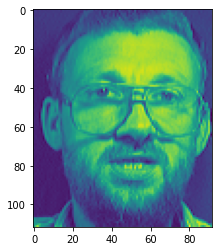

In [20]:
plt.imshow(np.reshape(X_test[109],(112,92)));

In [24]:
X_train = np.array(X_train,dtype='float32')/255

X_test = np.array(X_test,dtype='float32')/255


height=112
width=92
input_shape=(height, width, 1)

#change the size of images
X_train = X_train.reshape(X_train.shape[0], *input_shape)
X_test = X_test.reshape(X_test.shape[0], *input_shape)

print('x_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: (240,)
x_test shape: (160,)


In [28]:
backend.clear_session()

model = Sequential()

model.add(layers.Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))


model.add(layers.Conv2D(64, kernel_size= (3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))




model.add(layers.Flatten())

model.add(layers.Dense(512))
model.add(layers.Activation('relu'))

model.add(layers.Dense(256))
model.add(layers.Activation('relu'))

model.add(layers.Dense(20 , activation='softmax'))

model.compile(optimizer= Adam(), loss = 'sparse_categorical_crossentropy', metrics = 'Accuracy')
model.summary()


history = model.fit(X_train,y_train, epochs = 50,validation_data = (X_test,y_test) , batch_size = 32)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 90, 32)       320       
_________________________________________________________________
activation (Activation)      (None, 110, 90, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 43, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 43, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 21, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 34944)             0

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])


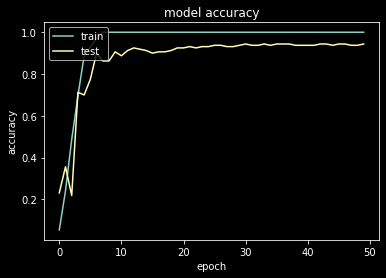

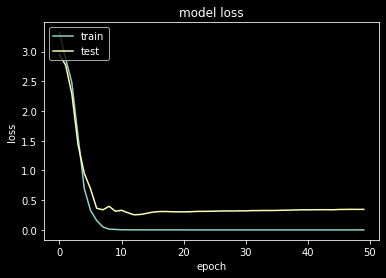

In [29]:
#Confution Matrix and Classification Report
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print(history.history.keys())

with plt.style.context('dark_background'):
    # summarize history for accuracy
    plt.plot(history.history['Accuracy'])
    plt.plot(history.history['val_Accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


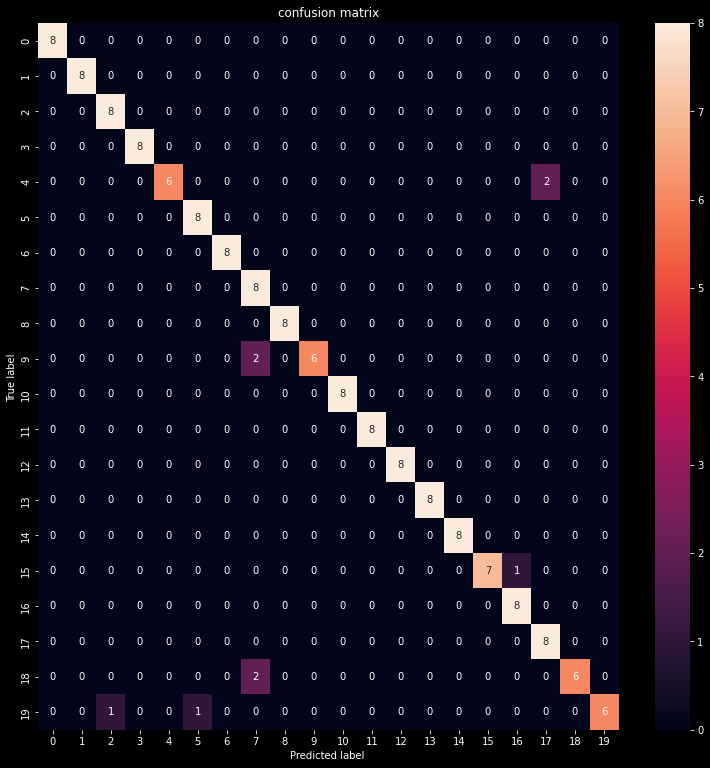

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         8
           4       1.00      0.75      0.86         8
           5       0.89      1.00      0.94         8
           6       1.00      1.00      1.00         8
           7       0.67      1.00      0.80         8
           8       1.00      1.00      1.00         8
           9       1.00      0.75      0.86         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      0.88      0.93         8
          16       0.89      1.00      0.94         8
          17       0.80    

In [30]:

def model_detail():
    with plt.style.context('dark_background'):
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(13,13))
        f = sns.heatmap(cm, annot=True, fmt='d')
        f.set_title("confusion matrix" , color = "white")
        plt.xlabel("Predicted label " , color = "white")
        plt.ylabel("True label " , color = "white")
        plt.show()
    print(classification_report(y_test,y_pred))


model_detail()

In [ ]:
exit()